In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Softmax with temperature

This notebook presents how change in temperature in [softmax](https://en.wikipedia.org/wiki/Softmax_function) function are related to changes in distribution [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)).


Softmax with temperature is defined as:

$$\Large softmax(x_i) = \frac{e^{\frac{x_i}{t}}}{\sum_{j=0}^{K}e^{\frac{x_j}{t}}}$$

where $t$ is temperature.

## Define functions

In [2]:
def softmax_t(x, t=1):
    return np.exp(x / t) / np.sum(np.exp(x / t))

In [3]:
def shannon_entropy(x):
    return -np.sum(x * np.log2(x))

## Create data


Let's assume a 10-class classification problem. We'll randomly pick 10 values and interpret them as pre-softmax logits.

In [4]:
logits = np.random.randn(10)

In [5]:
# Sanity check
probas = softmax_t(logits)
logits, probas, probas.sum()

(array([-1.1154907 ,  2.17026302,  0.35685723,  0.30030871, -0.99708765,
         2.68888018,  0.72658424,  0.12639764, -0.93873531,  0.33500481]),
 array([0.01026047, 0.27425348, 0.04473012, 0.04227088, 0.01155019,
        0.46066447, 0.06473966, 0.03552325, 0.01224423, 0.04376326]),
 1.0)

Let's plot our probabilities with low (==.01), default (==1), high (==3) and very high (==100) temperatures.

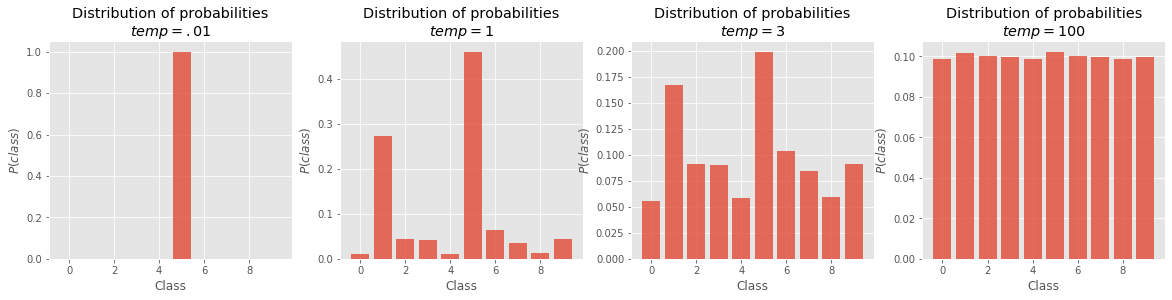

In [6]:
plt.figure(figsize = (20, 4))

plt.subplot(1, 4, 1)
plt.bar(np.arange(len(probas)), softmax_t(logits, .01), alpha = .8)
plt.title('Distribution of probabilities\n$temp = .01$')
plt.xlabel('Class')
plt.ylabel('$P(class)$')

plt.subplot(1, 4, 2)
plt.bar(np.arange(len(probas)), probas, alpha = .8)
plt.title('Distribution of probabilities\n$temp = 1$')
plt.xlabel('Class')
plt.ylabel('$P(class)$')

plt.subplot(1, 4, 3)
plt.bar(np.arange(len(probas)), softmax_t(logits, 3), alpha = .8)
plt.title('Distribution of probabilities\n$temp = 3$')
plt.xlabel('Class')
plt.ylabel('$P(class)$')

plt.subplot(1, 4, 4)
plt.bar(np.arange(len(probas)), softmax_t(logits, 100), alpha = .8)
plt.title('Distribution of probabilities\n$temp = 100$')
plt.xlabel('Class')
plt.ylabel('$P(class)$')

plt.show()

We can see that relative differences between probabilities decrease when temperature $t$ increases. For extremely low values of $t$ we get very close to "hard" max function. For very high values of $t$ we're approaching uniform distribution. 

Looking at the plots above, we expect that entropy of the distribution should increase with temperature $t$ (which probably sounds very intuitive to those of you wiyh background in physics).

Let's check it!

## Compute entropy for different values of $t$

In [7]:
temps = []
probas = []
entropies = []

for t in np.arange(.01, 100.01, .1):
    probas_ = softmax_t(logits, t)
    probas.append(probas_)
    temps.append(t)
    entropies.append(shannon_entropy(probas))

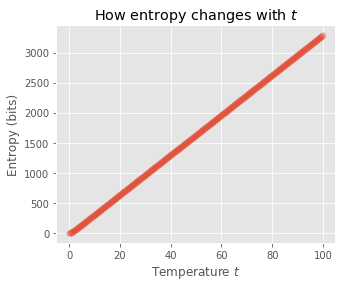

In [8]:
plt.figure(figsize = (5, 4))
plt.scatter(temps, entropies, alpha = .1)
plt.xlabel('Temperature $t$')
plt.ylabel('Entropy (bits)')
plt.title('How entropy changes with $t$')
plt.show()